In [57]:
student_id = "Harriet Rawson"
student_first_last_name = "s218291057"
print(student_id, student_first_last_name)

Harriet Rawson s218291057


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [59]:
dht_data = pd.read_csv("week2.csv", header=0, sep=",")
print (dht_data.describe())

          Timestamp     Humidity  Temperature
count  2.661000e+03  2661.000000  2661.000000
mean   2.024072e+13    46.869823    21.053063
std    4.323976e+05     0.758730     0.722394
min    2.024072e+13    44.900000    19.700000
25%    2.024072e+13    46.400000    20.300000
50%    2.024072e+13    46.700000    21.300000
75%    2.024073e+13    47.200000    21.600000
max    2.024073e+13    49.800000    22.200000


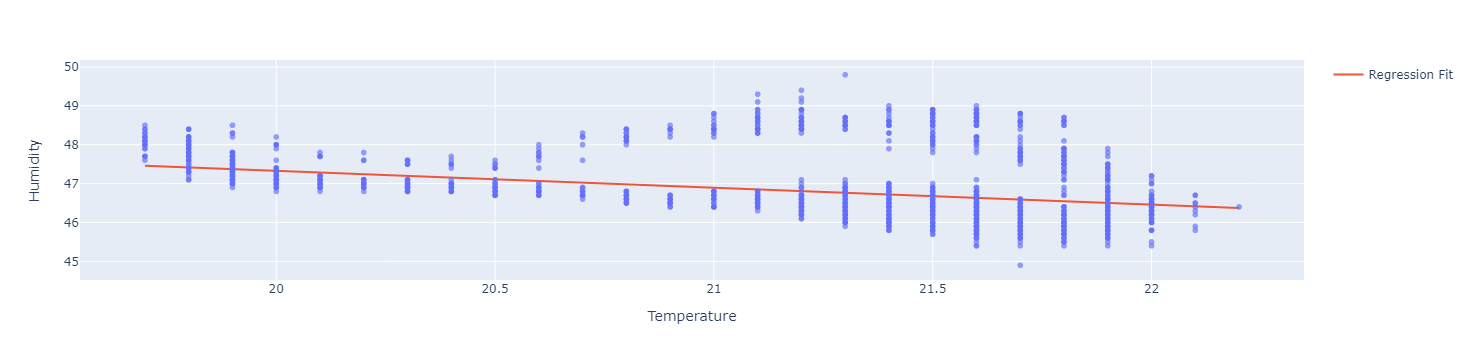

In [60]:
df = dht_data
X = df.Temperature.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.Humidity)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='Temperature', y='Humidity', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

The trend line follows the data points more closely when the temperature is lower. As the temperature increases, points draw further away from the regression fit, until the temperature is just under 22. At this point, the points draw back in closer to the regression line again. It is primarily between 20.8-21.8 that there is more variance. The only notable outlier is at (21.3, 49.8). Without the timestamp or a graph plotted with time on the x-axis, it is difficult to see what could have led to this - is it truly an anomaly? Or is there some reasoning behind it that would become clearer given context? 

In [61]:
clean_data1 = df[(df['Temperature'] > 19.7) & (df['Temperature'] < 22.1)]
print(clean_data1.describe())

          Timestamp     Humidity  Temperature
count  2.620000e+03  2620.000000  2620.000000
mean   2.024072e+13    46.857595    21.065038
std    4.311070e+05     0.751986     0.709887
min    2.024072e+13    44.900000    19.800000
25%    2.024072e+13    46.400000    20.300000
50%    2.024072e+13    46.700000    21.300000
75%    2.024073e+13    47.200000    21.600000
max    2.024073e+13    49.800000    22.000000


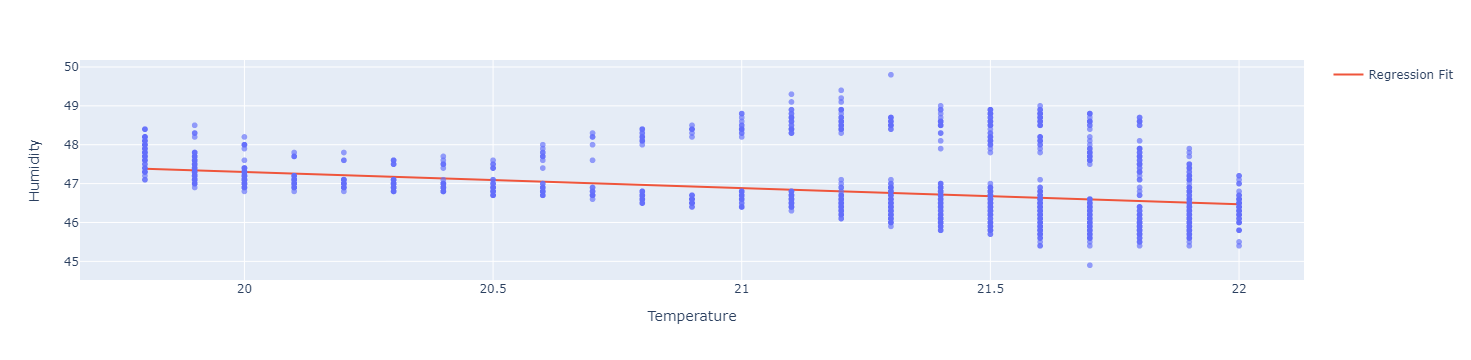

In [62]:
df1 = clean_data1
X = df1.Temperature.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df1.Humidity)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df1, x='Temperature', y='Humidity', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

I don't really think removing temperature values has changed very much. The slope still seems the same, and the outliers are still in regards to humidity. 

In [63]:
clean_data2 = df[(df['Humidity'] > 45) & (df['Humidity'] < 49.5)]
print(clean_data2.describe())

          Timestamp     Humidity  Temperature
count  2.659000e+03  2659.000000  2659.000000
mean   2.024072e+13    46.869462    21.052727
std    4.324149e+05     0.755920     0.722540
min    2.024072e+13    45.400000    19.700000
25%    2.024072e+13    46.400000    20.300000
50%    2.024072e+13    46.700000    21.300000
75%    2.024073e+13    47.200000    21.600000
max    2.024073e+13    49.400000    22.200000


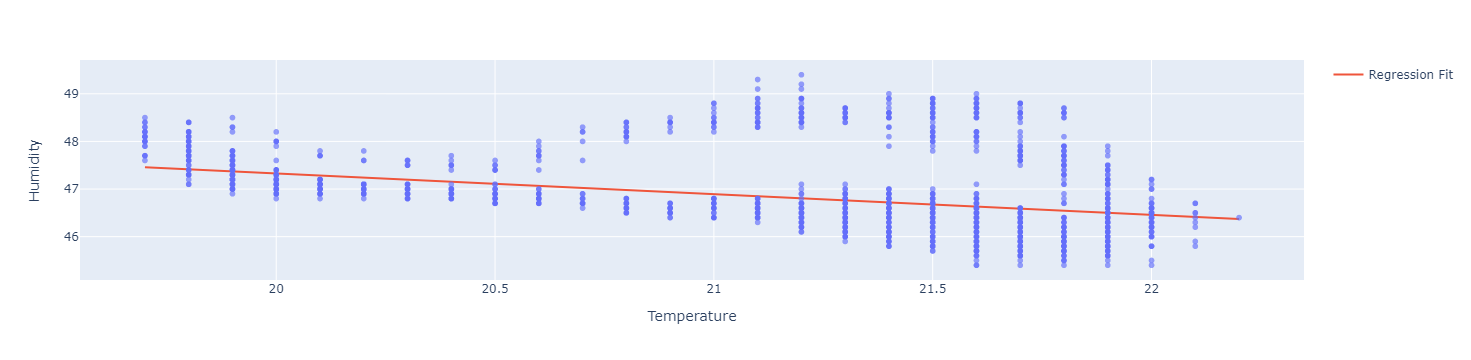

In [64]:
df2 = clean_data2
X = df2.Temperature.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df2.Humidity)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df2, x='Temperature', y='Humidity', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

Here, if I remove some of the outlying humidity values, still not much has changed. In fact, the gap above the regression line and below the humidity values seems more obvious. 

In [65]:
clean_data3 = df[(df['Temperature'] > 20) & (df['Temperature'] < 21.8)]
print(clean_data3.describe())

          Timestamp     Humidity  Temperature
count  1.779000e+03  1779.000000  1779.000000
mean   2.024072e+13    46.820461    21.192299
std    4.063187e+05     0.783992     0.491265
min    2.024072e+13    44.900000    20.100000
25%    2.024072e+13    46.400000    21.000000
50%    2.024072e+13    46.600000    21.400000
75%    2.024073e+13    47.000000    21.600000
max    2.024073e+13    49.800000    21.700000


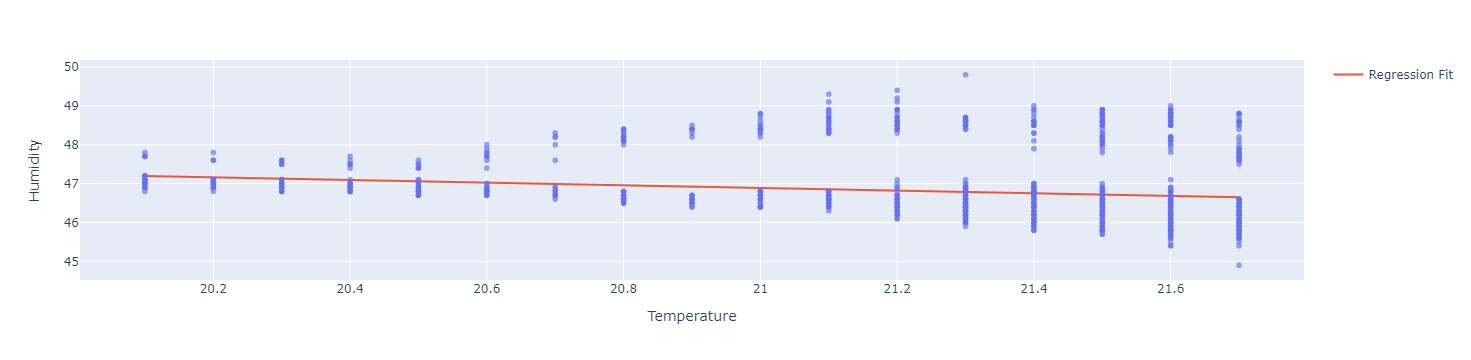

In [66]:
df3 = clean_data3
X = df3.Temperature.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df3.Humidity)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df3, x='Temperature', y='Humidity', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

Once again, after removing even more temperature values, the line's slope is less steep, but the humidity outliers still remain. 